# Introduction to Monte Carlo Methods

In this notebook we will introduce Monte Carlo methods through a series of examples.

Note-- one applicaiton of this method is to forward model your data, then to compare results of aplying your statistical methods to that synthetic data set to quantify the significance and biase of your results.  I use this all the time.


#### Useful refernce
1. [Wikipedia article on monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method)


### Overview
In the examples below we will use random number generators to create realziations of statistical distribtions which we will use to model exeperiments.  These exampels illustrate how the monte carlo method can be used to generate statisitcal distribitons of a complicated experiment including its analysis.  This end-to-end simualtion apporach allows for a careful understanding of the statistical errors, and quantificaiton of how exerprimental and analysis choices can lead to bias.  This method is a work horse of data analysis.  We will use it extensivetly throughout this course.

## Example 1: propigation of gaussain errors

Generate two gaussain distribtions labeled x and y with unit variance and zero mean.  Compute the error on the difference of these two quantities by simulating the distribiton of this difference.  I have added the hisogram code from last time below.  I will modify it in real time in class to solve this problem

In [3]:
import numpy as np
import matplotlib.pyplot as plt

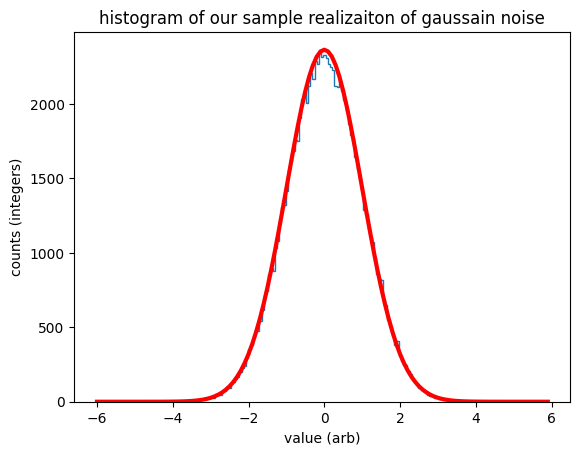

In [4]:
N= 100000
x = np.random.randn(N)
#y = np.random.randn(N)

data = x

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")
plt.stairs(counts, bins)


#plt.hist(, bins='auto')

## overplot the analytic form of a gaussin, guess the ampltude 
A = np.max(counts)
sigma = 1
x = np.arange(-6,6,0.1)
Gaussian = A *np.exp(-0.5*(x/sigma)**2)
plt.plot(x,Gaussian,"r-",linewidth=3)
plt.title("histogram of our sample realizaiton of gaussain noise")
plt.ylabel("counts (integers)")
plt.xlabel("value (arb)")
plt.show()

## Example 2: throwing darts with bad aim

Imagine that you make a machine that will throw darts in random but bounded directions.   You set this machiene up so that the darts will land within a square bounded by -1 and 1 in X and with the same bounts in Y.   What is the probability that the darts land within a circle of radius 1?


We will answere this question by:
1. simulating a uniform distribiton of points covering our square which represnt the outcome of throwng N darts
1. computing the distance from the center of the board which is hit by each dart
1. testing if these darts fall within our circle
1. computing the ratio of the number of darts within our ciricle compared to the total number of darts thrown

fraction in circle:  0.787


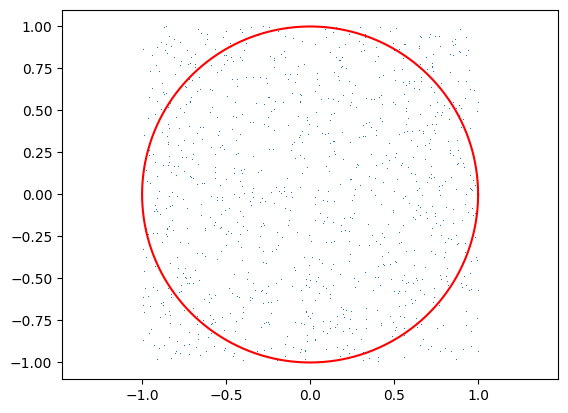

In [27]:
Nsamps = 1000
## generate positions following a uniform distribiton in 2d, and center them at zero
x = np.random.uniform(-1,1,Nsamps)
y = np.random.uniform(-1,1,Nsamps)

## plot these
plt.plot(x,y,",")
plt.axis("equal")

## make a circle
theta = np.linspace(0,2*np.pi,1000)
x_circ = np.cos(theta)
y_circ = np.sin(theta)

## plot a ciricle
plt.plot(x_circ,y_circ,"r")

## compute the distance from the center of a ciricle for our uniform distribtion
r = np.sqrt(x**2 + y**2)

## count how many ponts are inside the circle
inside_circle = np.where(r < 1)

## print the fraction of the points in the circle 
print("fraction in circle: ", np.size(inside_circle) / np.size(r))



This simple example highlights two aspects of Monte Carlo simulations.  

### monte carlo is a technquie for computing integrals
It is quite obvious that the result we have computed is given by the following formula:
$$P = \frac {\int_{disc}dA} {\int_{square}dA} = \frac {\pi r^2} {(2 r)^2} = \frac \pi 4 $$
At its core the monte carlo technqies is just a method to numericall approximate integrals. While this example is realtively simple, it can be applied for vasly more complex calculations.  Even though this is simple it is a method that has been used for numerically compting the value of $\pi$.   

Note-- to do this efficienly for the large number of trials, I would modfy this code to iterate, rather than use array operations to enable large sampls with out over using working memory.    That said, we check the accuracy of our recoved value of $\pi$ here.


### monte carlo enables forward modeleling of complex experiments 
As posed, this example is simulating the result of an exmperiment, starting with a stitistical distrution describing the experiment, then applying a nonlinear operator.     In other words we have built a statistical model of the output of the experiment.  Forward modeling is a key technique in analysis since it allows us to generate realizations of the experiments output, starting with theory, and includig (if we do it right) all the key steps that modify the statistics of the output.   Comparison of such sims to measurments enables careful and robust interpretion of experimental results.   Competency in this approach is a key goal for this class.




In [8]:
## compare our probability to pi

print("probability times four: ", np.size(inside_circle) / np.size(r)*4, "precomputed valuye of pi: ", np.pi)

probability times four:  3.15152 precomputed valuye of pi:  3.141592653589793


## Example 2: modeling an imprefect particle counting detector with noise, and non-linearity.

It is common to discover problems with an experiment after the data set has been taken.  Here we consider a measuremnt of a particle event rate.  The detector under consideration produces a voltage proportional to the number of particles impinging on the detector.   Initially it was asusmed that each particle produces a 25 mV signal, but after the data were taken it was discoved this is only true in the samll signal limit since the output becomes nonlinear.  We can model this nonlinearity as:

$$V_{ouput} = 25 mV * 20 \tanh{ \left(\frac {N_{particles}} {20} \right)  } $$

Excercise (optional): plot this fucntion to understnad what it does.   It is a generic funciton which can paramterize non-linearity which comes up often. 


This detector also has from noise which follows a gaussin disrtibution with a mean of 15 mV and stabdard deviation of 30 mV per sample.

Assuming you test three samples which yield the following mean oututs of the detector (taken over 1000 samples).   What is the average number of particles detected in each case.  Estimate the uncertainty if these values are know to 5%.
1. 25 mV
1. 250 mV
1. 500 mV


To solve this we will model the particles falling on the detector as a poisson distribtion with N_particles_mean as the mean number.  We thin pass this through the response funciton given above, add gaussin noise, and the compute the mean.  This variable N_particles_mean will be varried to reporduce the measrued voltage.   For reference we plot a nieve estimate of the number of particles detected which is computed by dividign the ouput by 25 mV-- this will only be valid in the linear regime.  If the signals are too low, noise will dominate and bias the result high.  In the high signal regine the nonlinearity will cause this to be a grose underestimate.  A comparison of this plot to the output you compute highlights the usefullness of forward modeling of data through the montey carlo method.



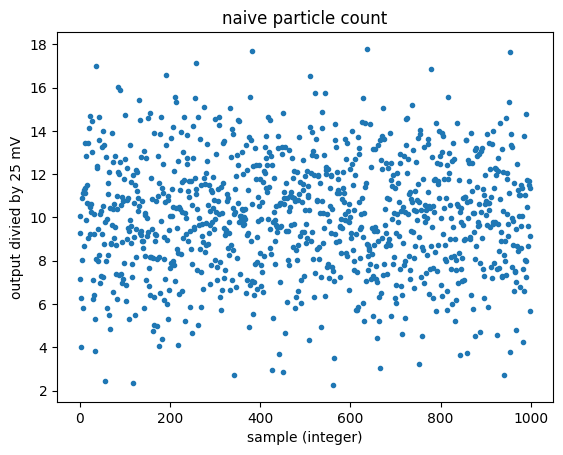

simulated RMS of a data set:  250.8115892894391
given an average of N =  10.5 hitting the detector durign each sample


In [30]:
N= 1000

## set up a model for the particles detected
N_paricles_mean = 10.5
N_paricles_per_sample = np.random.poisson(N_paricles_mean,N)

## set up the noise
noise = np.random.randn(N)*30 +15 ## in mV

## comput the output voltage, in mV
V_out = 25 * 20 * np.tanh(N_paricles_per_sample / 20)
V_out += noise

## plot the output divided by 25 mV, so that it would be
    ## proportional to the number of particles in the small signal, no noise limit
plt.plot(V_out/25,".")
plt.title("naive particle count")
plt.xlabel("sample (integer)")
plt.ylabel("output divied by 25 mV")
plt.show()

print("simulated RMS of a data set: ",np.mean(V_out))
print("given an average of N = ",N_paricles_mean, "hitting the detector durign each sample")


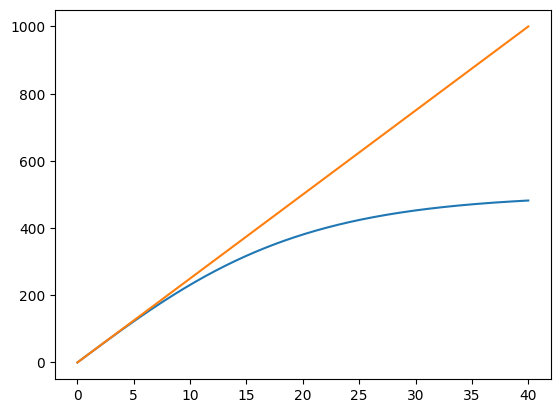

In [32]:
x = np.linspace(0,40,1000)
plt.plot(x,np.tanh(x/20)*20*25)
plt.plot(x,x*25)

### Discussion

In this example we see that at the low signal end there is a additive bias from the noise that needs to be accounted for.   The simulations natually handle this.  However, it requires modeingly the noise properly.  In practice we have to be very carful about this as any errors in the model will lead to systematic uncertainties.

In the high signal to noise regime, the detector properties lead to a multiplicitive bias that is signal amplitude dependant.   The simualtion handles this, however any uncerainties in the correction will again lead to systematic biases.

We can vary the paratmers in the noise model and in the detector nonlinearity model to arrive at systatmic uncertines for our measurment.  This size of this systematic effect will depent strongly on the signal amplitude.

## Example 3: computing the number of high energy neutrinos that will be detected

Discuss in class--- brainstomrm how we would do this starting with the astrophysical flux and a model of the detector response vs energy, position, and other variables. 

## Example 4: modeling statiscal bias from the removal of outliers

Discuss in class-- if you have outliers in your data, you can cut these.   These cuts will bias your results.  If you apply these cuts to the simulation and the data then the comparison will remove this bias and allow estimation of the systematic uncerainties.